# Stock Trading test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from elegantrl.run import *
from elegantrl.agent import AgentPPO, AgentDDPG
from stock_env import StockEnv

In [3]:
tickers = ['COKE']

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2008-03-19'
start_eval_date = '2016-01-01'
end_eval_date = '2021-01-01'

# Agent
agent = AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agent.if_use_gae = True
agent.lambda_entropy = 0.04
agent.if_on_policy = True

# Environment
env = StockEnv()
env_eval = StockEnv()

env.target_reward = 100
env_eval.target_reward = 100
env.max_step = 100

args = Arguments(env, agent)

print(env.if_discrete)



# Hyperparameters
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.rollout_num = 2 # the number of rollout workers (larger is not always faster)

False


In [ ]:
env._get_data()

In [ ]:
env.reset()

In [ ]:
env._get_length_of_data()

In [ ]:
train_and_evaluate_mp(args)

| Keep cwd: ./AgentPPO_RL_StockEnv-v1_(0,)


[1.0,
 0.99911,
 0.99735,
 0.99966,
 0.9968199999999999,
 0.99322,
 0.9956799999999998,
 0.9902199999999999,
 0.9842999999999998,
 0.9838499999999999,
 0.9855499999999999,
 0.9900599999999999,
 0.9907799999999999,
 0.99039,
 0.99249,
 0.9936899999999999,
 0.9927299999999999,
 0.9864399999999999,
 0.9896799999999998,
 0.9896799999999998,
 0.9896799999999998,
 1.0001799999999998,
 0.9970999999999999,
 1.00216,
 1.0036999999999998,
 1.0331799999999998,
 1.0243799999999998,
 1.01426,
 0.9979799999999998,
 1.0034799999999997,
 1.01096,
 0.9995199999999997,
 0.9871999999999999,
 0.9946799999999998,
 1.00282,
 0.98808,
 0.9926999999999998,
 1.01382,
 1.01426,
 1.0331799999999998,
 1.0380199999999997,
 1.04968,
 1.0582599999999998,
 1.0701399999999999,
 1.08158,
 1.0701399999999999,
 1.0736599999999998,
 1.0802599999999998,
 1.0736599999999998,
 1.0765199999999997,
 1.0765199999999997,
 1.0780599999999998,
 1.0771799999999998,
 1.0639799999999997,
 1.0443999999999998,
 1.04484,
 1.047919999999

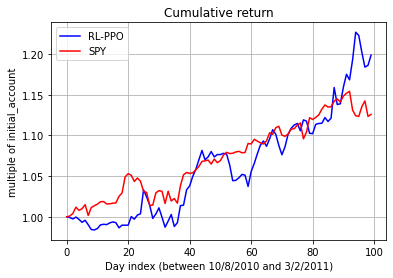

In [4]:
agent.if_on_policy = False
args = Arguments(env_eval, agent)

args.if_remove = False
args.cwd = './AgentPPO_RL_StockEnv-v1_(0,)'
args.init_before_training()

env.draw_cumulative_return(args, torch)